### Url and section of the page scrapped for the prototype.

url = https://www.ema.europa.eu/en/human-regulatory/overview/public-health-threats/coronavirus-disease-covid-19/covid-19-whats-new


The highligted "table" in thepage was scaped as a demo.

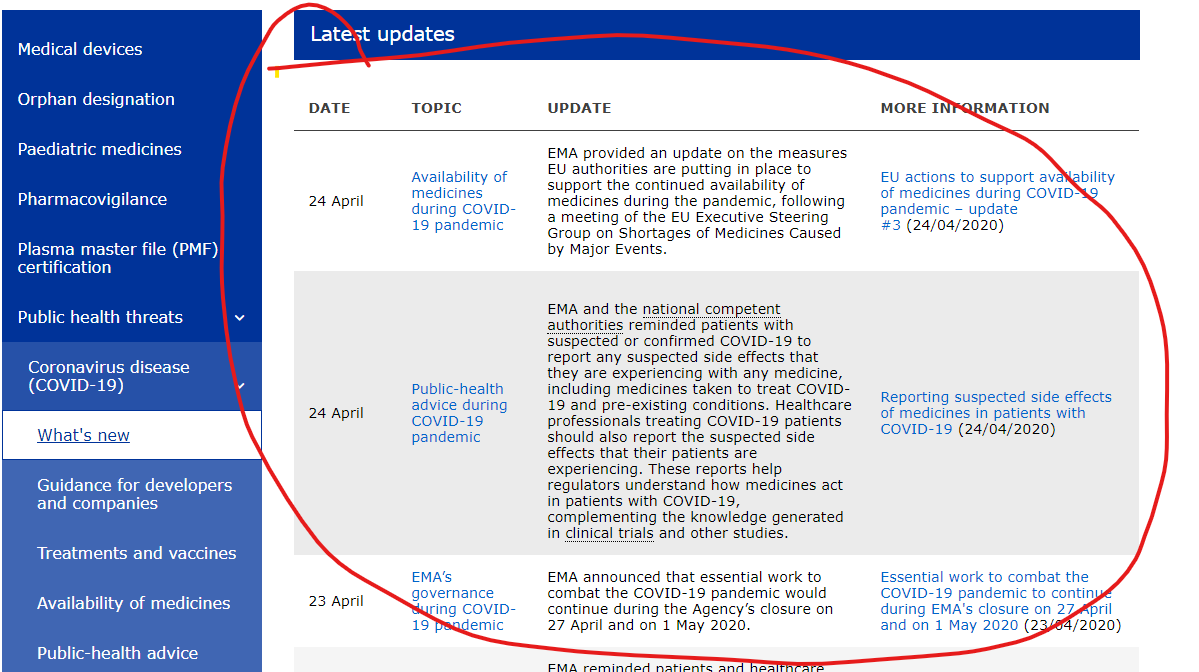

The idea is to scrap relevant content from the page and then create a dataframe out of those scrapped data. Here I have scrapped teh table which was available on the page so the scrapped data had a suitable format for a dataframe. However for other texts, blobs, links, document content etc we will have to do formatting.

As of now I have some questions here-->
* Do we have a rough picture of what type of content we are trying to parse fromt hese websites?
* Where the completed web scrapper would be run? Will it be on a server or cluster?. Depending on the hadware available we can think of the depth to which we can scrap.
* In what format do we want to collect the data. Will it be a single dataframe or multiple dataframes as per teh type of content scrapped.

### The parser prototype
Parser function to parse the websites and creating a dataframe.

In [1]:
from bs4 import BeautifulSoup
import requests
import pandas as pd

In [2]:
def parse(url):
    fetched_content = requests.get(url)
    soup = BeautifulSoup(fetched_content.content, 'lxml')
    table = soup.find('table', { 'class' : "ecl-table ecl-table--responsive" })
    
    rows = []
    trs = table.find_all('tr')
    headerow = [td.get_text(strip=True) for td in trs[0].find_all('th')]
    if headerow: 
        rows.append(headerow)
        trs = trs[1:]
    for tr in trs: 
        rows.append([td.get_text(strip=True) for td in tr.find_all('td')])
    return rows

def return_dataframe(raw_content):
    return pd.DataFrame(raw_content[1:], columns=raw_content[0])

In [3]:
raw_content = parse("https://www.ema.europa.eu/en/human-regulatory/overview/public-health-threats/coronavirus-disease-covid-19/covid-19-whats-new")

dataframe = return_dataframe(raw_content)
dataframe.head(3)

,DATE,TOPIC,UPDATE,MORE INFORMATION
0,24 April,Availability of medicines during COVID-19 pand...,EMA provided an update on the measures EU auth...,EU actions to support availability of medicine...
1,24 April,Public-health advice during COVID-19 pandemic,EMA and thenational competent authoritiesremin...,Reporting suspected side effects of medicines ...
2,23 April,EMA’s governance during COVID-19 pandemic,EMA announced that essential work to combat th...,Essential work to combat the COVID-19 pandemic...


In [4]:
dataframe.to_csv("parsed_sample.csv")